In [1]:
from IPython.display import Image

# 결정트리 or 의사결정나무 (Decision Tree)

결정트리를 가장 단수하게 표현하자면, **Tree 구조를 가진 알고리즘**입니다.

의사결정나무는 데이터를 분석하여 데이터 사이에서 패턴을 예측 가능한 규칙들의 조합으로 나타내며, 이 과정을 시각화 해 본다면 마치 **스무고개** 놀이와 비슷합니다.

In [2]:
Image(url='https://miro.medium.com/max/2960/1*dc_342kIsHCzuko1TtyEGQ.png', width=500)

결정트리의 기본 아이디어는 sample이 가장 섞이지 않은 상태로 완전히 분류되는 것, 다시 말해서 **엔트로피(Entropy)를 낮추도록** 만드는 것입니다.

## 엔트로피 (Entropy)

엔트로피는 쉽게 말해서 **무질서한 정도를 정량화(수치화)한 값**입니다.

다음은 **엔트로피 지수를 방이 어질러있는 정도를 예시로 들어 표현**되었습니다.

In [3]:
Image(url='https://image.slidesharecdn.com/entropyandthe2ndlaw-120327062903-phpapp02/95/103-entropy-and-the-2nd-law-3-728.jpg?cb=1335190079', width=500)

### 엔트로피 수식의 이해

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 샘플데이터를 생성합니다.
group_1 = np.array([0.3, 0.4, 0.3])
group_2 = np.array([0.7, 0.2, 0.1])
group_3 = np.array([0.01, 0.01, 0.98])

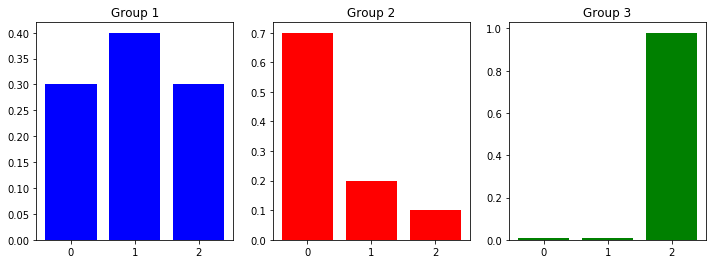

In [6]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(np.arange(3), group_1, color='blue')
axes[0].set_title('Group 1')
axes[1].bar(np.arange(3), group_2, color='red')
axes[1].set_title('Group 2')
axes[2].bar(np.arange(3), group_3, color='green')
axes[2].set_title('Group 3')
plt.show()

In [7]:
Image(url='https://miro.medium.com/max/1122/0*DkWdyGidNSfdT1Nu.png', width=350)

In [8]:
# entropy를 구현합니다.
def entropy(x):
    return (-x*np.log2(x)).sum()

### Entropy 계산 및 시각화

In [9]:
entropy_1 = entropy(group_1)
entropy_2 = entropy(group_2)
entropy_3 = entropy(group_3)

print(f'Group 1: {entropy_1:.3f}\nGroup 2: {entropy_2:.3f}\nGroup 3: {entropy_3:.3f}')

Group 1: 1.571
Group 2: 1.157
Group 3: 0.161


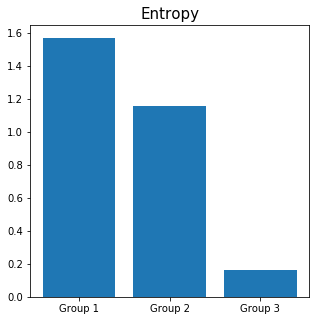

In [10]:
plt.figure(figsize=(5, 5))
plt.bar(['Group 1', 'Group 2', 'Group 3'], [entropy_1, entropy_2, entropy_3])
plt.title('Entropy', fontsize=15)
plt.show()

## 지니 계수 (Gini Index)

- 클래쓰들이 공평하게 섞여 있을 수록 **지니 계수**는 올라갑니다.
- Decision Tree는 지니 불순도를 낮추는 방향으로 가지치기를 진행합니다.

In [11]:
Image(url='http://www.learnbymarketing.com/wp-content/uploads/2016/02/gini-index-formula.png', width=350)

In [12]:
# Gini Index 구현합니다.
def gini(x):
    return 1 - ((x / x.sum())**2).sum()

In [13]:
# 샘플데이터를 생성합니다.
group_1 = np.array([50, 50])
group_2 = np.array([30, 70])
group_3 = np.array([0, 100])

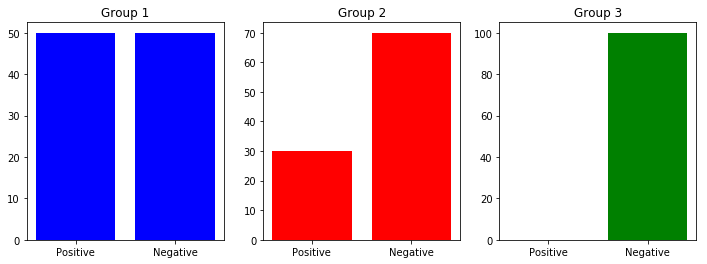

In [14]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(['Positive', 'Negative'], group_1, color='blue')
axes[0].set_title('Group 1')
axes[1].bar(['Positive', 'Negative'], group_2, color='red')
axes[1].set_title('Group 2')
axes[2].bar(['Positive', 'Negative'], group_3, color='green')
axes[2].set_title('Group 3')
plt.show()

In [15]:
gini_1 = gini(group_1)
gini_2 = gini(group_2)
gini_3 = gini(group_3)

print(f'Group 1: {gini_1:.3f}\nGroup 2: {gini_2:.3f}\nGroup 3: {gini_3:.3f}')

Group 1: 0.500
Group 2: 0.420
Group 3: 0.000


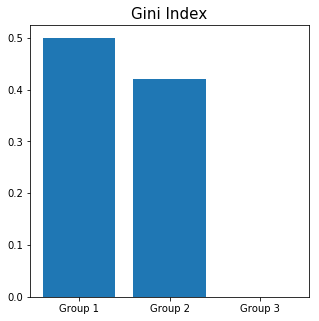

In [16]:
plt.figure(figsize=(5, 5))
plt.bar(['Group 1', 'Group 2', 'Group 3'], [gini_1, gini_2, gini_3])
plt.title('Gini Index', fontsize=15)
plt.show()

## Decision Tree 구현

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 42

In [18]:
# breast cancer 데이터셋 로드
cancer = load_breast_cancer()

In [19]:
# train, test 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=SEED)

In [20]:
# 알고리즘 정의
tree = DecisionTreeClassifier(random_state=0)

In [21]:
# 학습
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
# 예측
pred = tree.predict(x_test)

In [23]:
# 정확도 측정
accuracy = accuracy_score(pred, y_test)
print(f'Accuracy Score: {accuracy:.3f}')

Accuracy Score: 0.937


## 의사결정나무 시각화

In [24]:
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

def show_trees(tree):
    export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                    feature_names=cancer['feature_names'], 
                    precision=3, filled=True)
    with open("tree.dot") as f:
        dot_graph = f.read()
    pred = tree.predict(x_test)
    print('정확도: {:.2f} %'.format(accuracy_score(y_test, pred) * 100))

    display(graphviz.Source(dot_graph))

정확도: 93.71 %


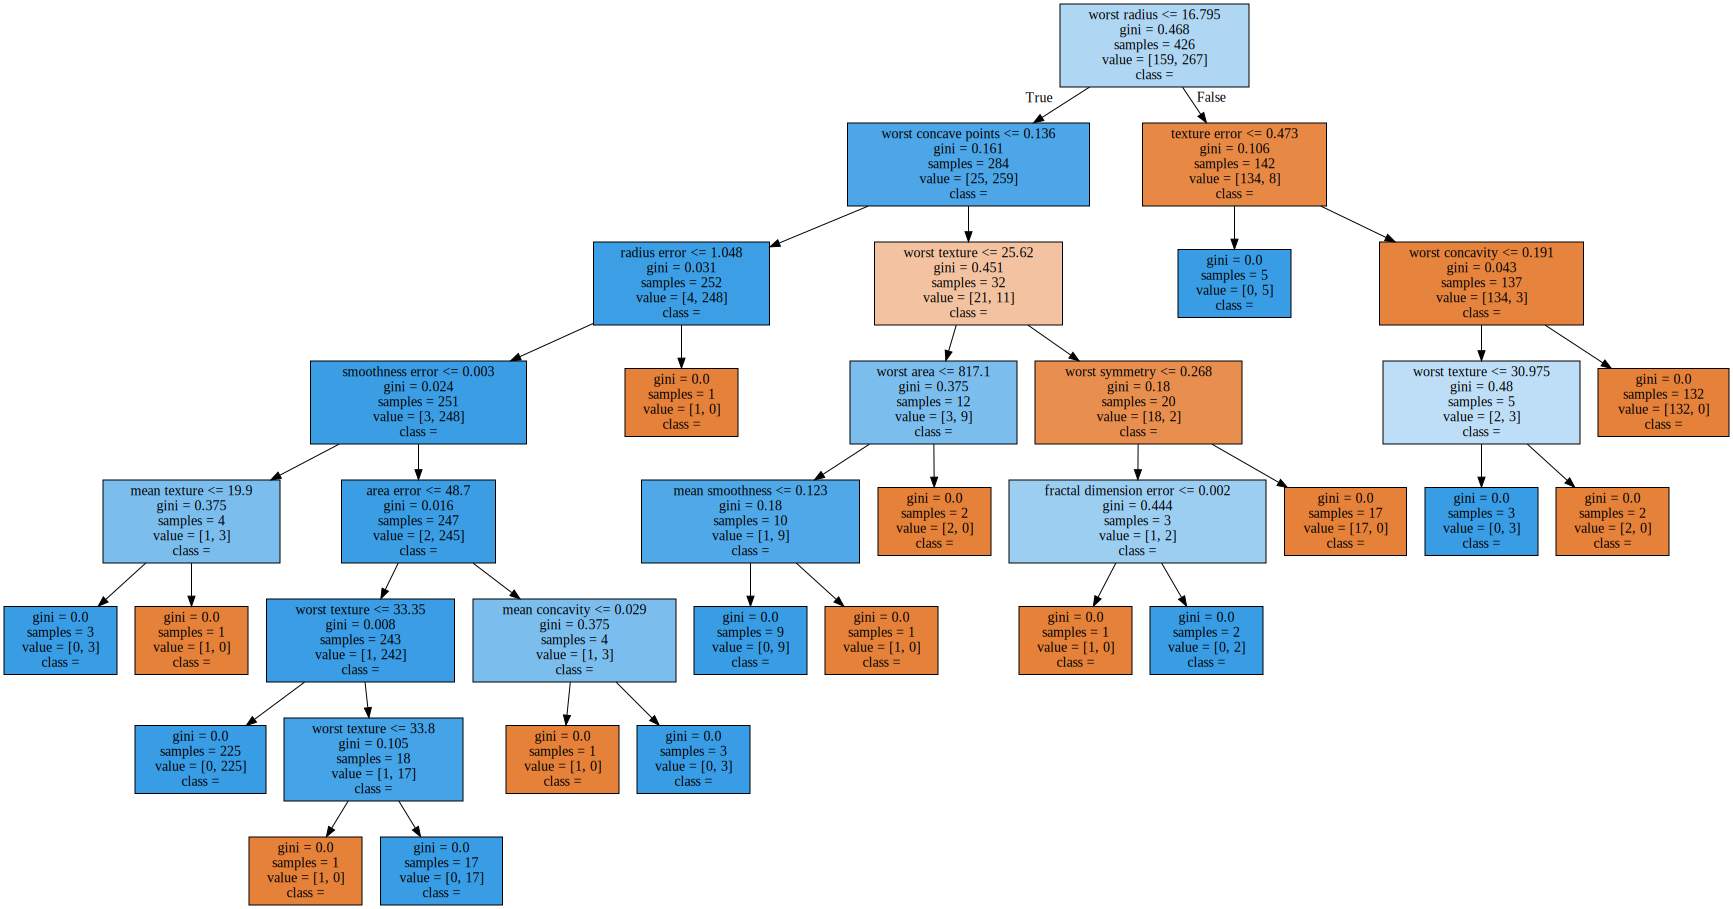

In [25]:
show_trees(tree)

## 주요 Hyper Parameter

### max_depth

`max_depth`는 최대 트리의 깊이를 제한 합니다.

기본 값은 None, 제한 없음 입니다.

정확도: 94.41 %


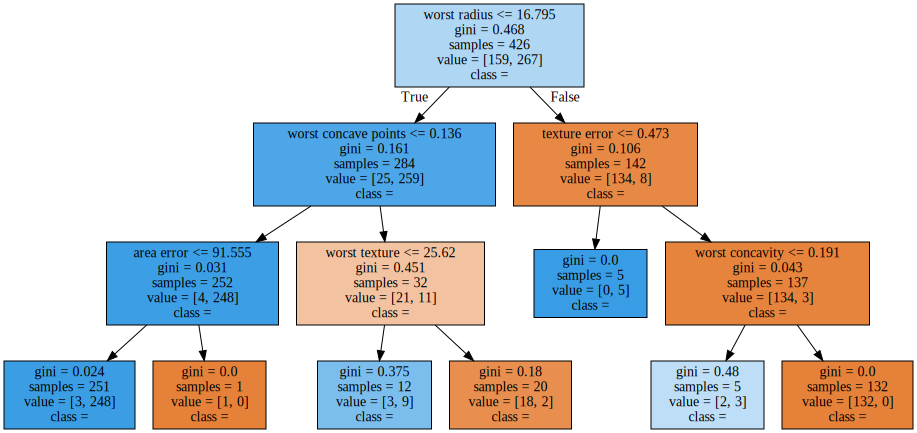

In [26]:
tree = DecisionTreeClassifier(max_depth=3, random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

### min_sample_split

`min_sample_split`은 노드 내에서 분할이 필요한 최소의 샘플 숫자입니다.

기본 값은 2입니다.

정확도: 94.41 %


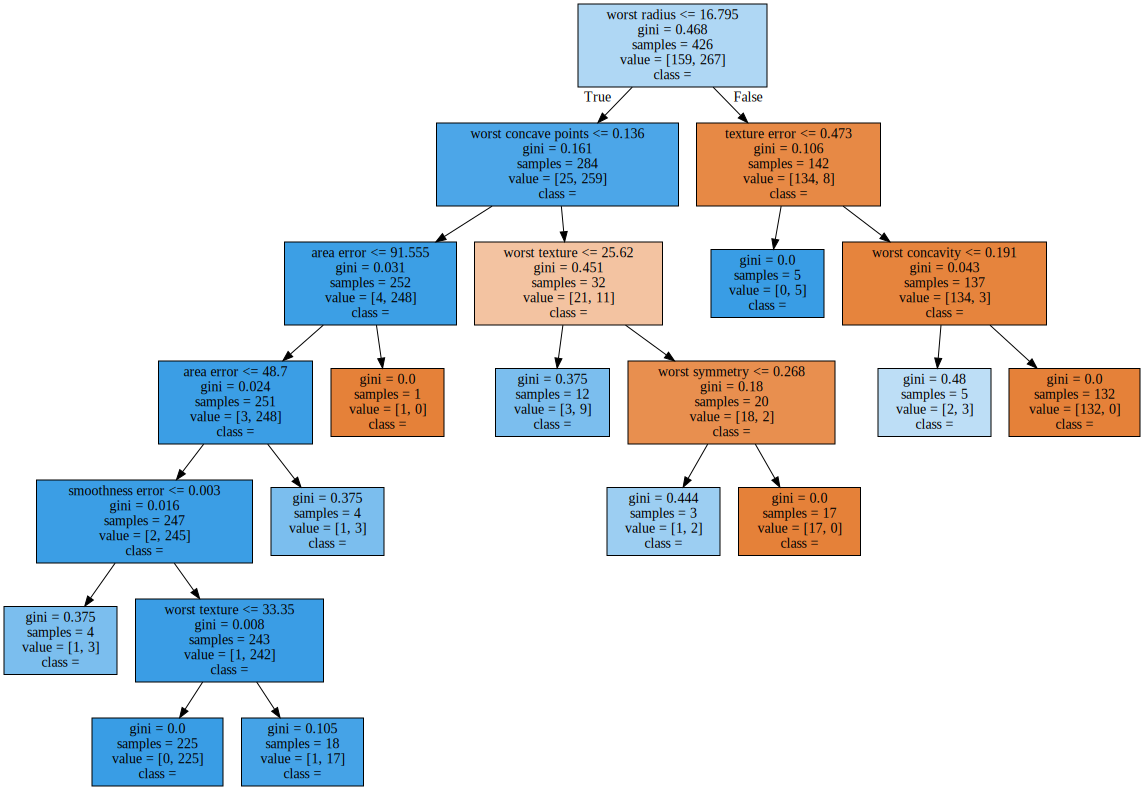

In [27]:
tree = DecisionTreeClassifier(max_depth=6, min_samples_split=20,  random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

### min_samples_leaf

`min_samples_leaf`는 말단 노드의 최소 샘플의 숫자를 지정합니다.

기본 값은 1 입니다.

In [28]:
DecisionTreeClassifier()

DecisionTreeClassifier()

### max_leaf_nodes

`max_leaf_nodes`는 말단 노드의 최대 갯수 (과대 적합 방지용)

기본 값은 None, 제한 없음 입니다.

정확도: 94.41 %


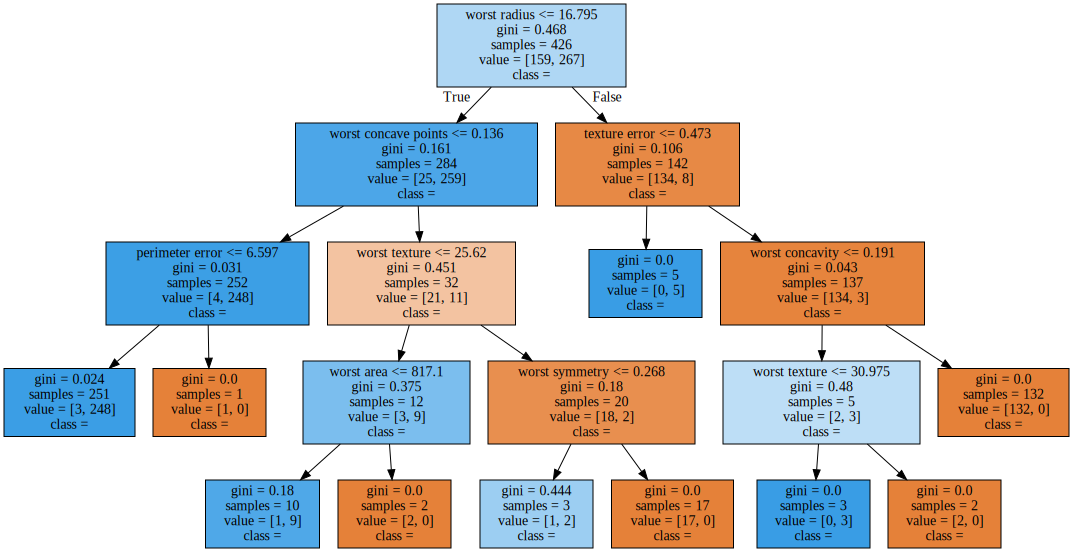

In [29]:
tree = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10, random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

### max_features

최적의 분할을 찾기 위해 고려할 피처의 수

0.8 은 80% 의 feature 만 고려하여 분할 알고리즘 적용

기본 값은 None, 모두 사용입니다.

정확도: 90.91 %


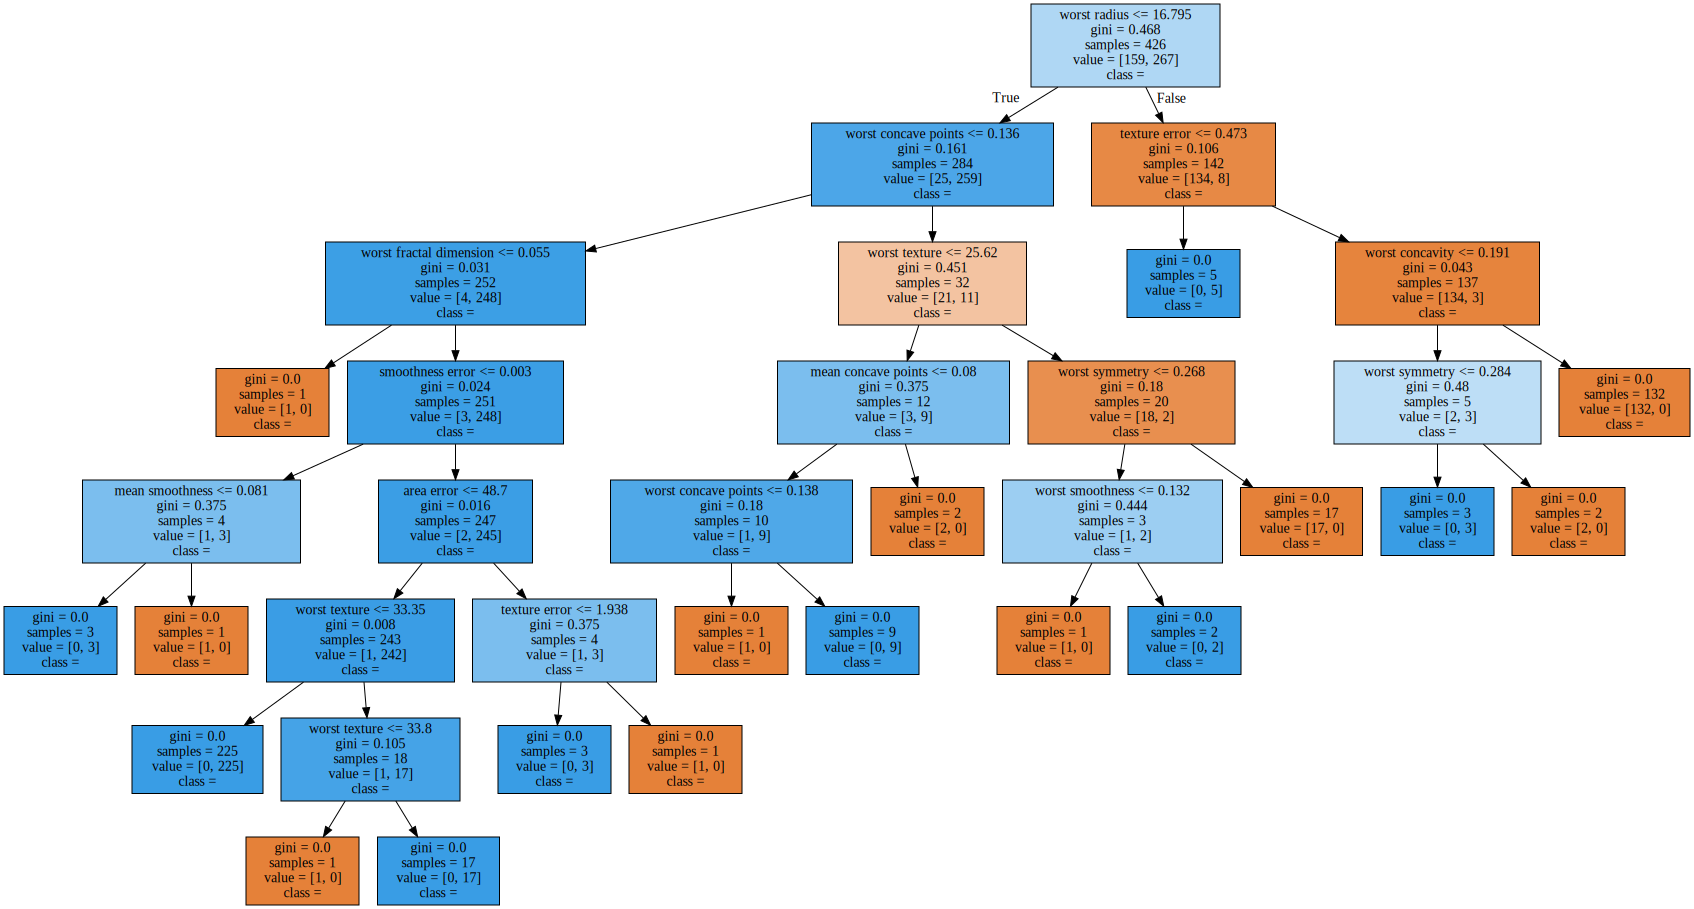

In [30]:
tree = DecisionTreeClassifier(max_depth=7, max_features=0.8, random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

## feature의 중요도 파악

`feature_importances_` 변수를 통해서 tree 알고리즘이 학습시 고려한 feature 별 중요도를 확인할 수 있습니다.

In [31]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.00752597,
       0.        , 0.        , 0.01354675, 0.        , 0.        ,
       0.        , 0.05383566, 0.        , 0.00238745, 0.00231135,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.69546322, 0.04179055, 0.        , 0.        , 0.00668975,
       0.        , 0.01740312, 0.12587473, 0.02341413, 0.00975731])

DataFrame으로 만들면 **중요도(feature importances) 순서로 정렬**할 수 있습니다.

In [32]:
df = pd.DataFrame(list(zip(cancer['feature_names'], tree.feature_importances_)), columns=['feature', 'importance']).sort_values('importance', ascending=False)
df = df.reset_index(drop=True)
df.head(15)

,feature,importance
0,worst radius,0.695463
1,worst concave points,0.125875
2,texture error,0.053836
3,worst texture,0.041791
4,worst symmetry,0.023414
5,worst concavity,0.017403
6,mean concave points,0.013547
7,worst fractal dimension,0.009757
8,mean smoothness,0.007526
9,worst smoothness,0.006690


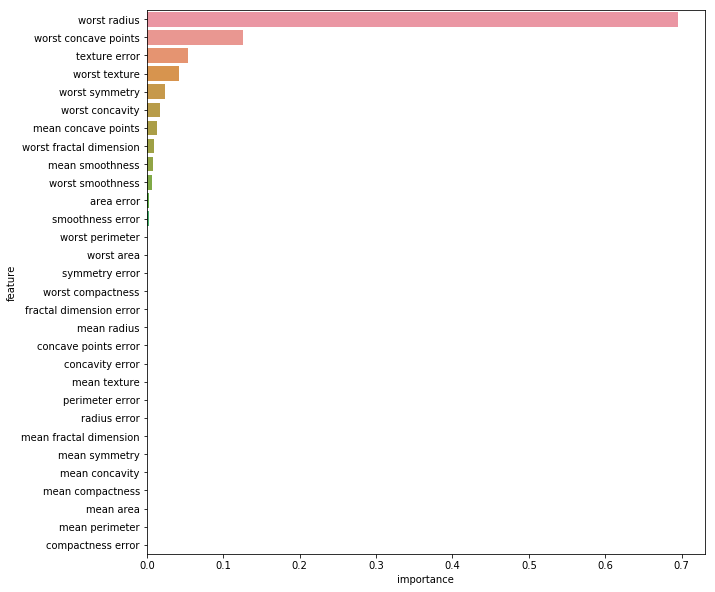

In [33]:
plt.figure(figsize=(10, 10))
sns.barplot(y='feature', x='importance', data=df)
plt.show()